In [11]:
import pandas as pd
import quandl 
import numpy as np
import math, datetime
from sklearn import preprocessing, cross_validation, svm, neighbors
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib import style
import pickle
import random
import xgboost as xgb

In [8]:
style.use("ggplot")

In [40]:
df=quandl.get("WIKI/GOOGL")

In [41]:
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [42]:
df=df[["Adj. Open","Adj. High","Adj. Low","Adj. Close","Adj. Volume"]]

In [43]:
df["HL-PCT"]=(df["Adj. High"]-df["Adj. Close"])/df["Adj. Close"]*100.0

In [44]:
df["PCT_change"]=(df["Adj. Close"]-df["Adj. Open"])/df["Adj. Open"]*100.0

In [45]:
df=df[["HL-PCT","PCT_change","Adj. Close","Adj. Volume"]]

In [46]:
df.head()

,HL-PCT,PCT_change,Adj. Close,Adj. Volume
Date,,,,
2004-08-19,3.712563,0.324968,50.322842,44659000.0
2004-08-20,0.710922,7.227007,54.322689,22834300.0
2004-08-23,3.729433,-1.227880,54.869377,18256100.0
2004-08-24,6.417469,-5.726357,52.597363,15247300.0
2004-08-25,1.886792,1.183658,53.164113,9188600.0


In [47]:
forecast_col="Adj. Close"

In [48]:
forecast_out=int(math.ceil(0.1*len(df)))

In [49]:
df["label"]=df[forecast_col].shift(-forecast_out)

In [50]:
df.dropna(inplace=True)

In [51]:
X = np.array(df.drop(['label'],1))
#X = preprocessing.scale(X)

In [52]:
X_lately=X[-forecast_out:]

In [53]:
X=X[:-forecast_out]

In [54]:
X=np.array(df.drop("label",axis=1))
y=np.array(df.label)

In [55]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)


In [56]:
clf=LinearRegression()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8424704677974193

In [92]:
clf.intercept_

38.394972587278232

In [95]:
clf.coef_

array([  9.25875898e+00,   4.65578918e+00,   1.12883856e+00,
        -1.45055813e-06])

In [96]:
X_train

array([[  1.45208132e-01,   2.52762522e+00,   1.55429797e+02,
          2.52175000e+07],
       [  1.01962128e+00,  -2.47863248e-01,   2.92678470e+02,
          4.88010000e+06],
       [  9.74835251e-01,  -5.60233600e-01,   2.93776861e+02,
          2.85450000e+06],
       ..., 
       [  1.20683220e+00,   8.02651617e-01,   5.62630000e+02,
          3.41644500e+06],
       [  7.03989273e-01,   5.67511378e-01,   8.97671024e+01,
          9.68030000e+06],
       [  2.81502713e-01,   5.40318016e-01,   9.79924934e+01,
          1.63392000e+07]])

In [57]:
forecast_set=clf.predict(X_lately)

In [58]:
print(forecast_set)

[ 612.80772026  615.74389694  615.39089972  622.48657472  646.08036551
  652.1826741   647.59282015  655.00644009  650.37252336  645.82511719
  643.00546138  642.50671051  630.20630715  620.57596418  611.56038522
  611.39301203  608.36722888  599.3162073   612.25495117  615.06923581
  609.71209993  618.49071415  618.36058519  633.77244698  656.23714291
  656.13847893  646.15780797  635.53884005  627.05898315  615.85326739
  662.61831755  639.32941508  647.1481256   642.40636067  637.25984015
  651.44658147  640.15436826  653.15624458  648.23727686  660.65727757
  662.55111508  659.16063828  656.05779617  657.12307065  652.18956855
  643.9235225   651.89005447  664.75664388  678.7744048   683.46840526
  691.99116979  693.35896063  694.86336246  696.40465838  691.06769573
  689.52833934  676.79683884  673.46778728  672.63119497  673.90634915
  677.13865847  670.21526896  682.54573344  677.60199176  674.9954593
  680.88800202  698.93105199  687.41948035  676.0372412   672.54669053
  672.4

In [59]:
df["Forecast"]=np.nan

In [60]:
last_date=df.iloc[-1].name

In [61]:
last_date

Timestamp('2016-04-04 00:00:00')

In [62]:
next_unix= last_date + datetime.timedelta(days=1)




In [63]:
next_unix

Timestamp('2016-04-05 00:00:00')

In [64]:
one_day=86400

In [65]:
for i in forecast_set:
    next_date= next_unix 
    df.ix[next_date]= [np.nan for _ in range(len(df.columns)-1)] +[i] 
    next_unix += datetime.timedelta(days= 1)

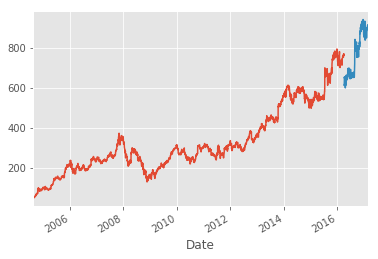

In [66]:
df["Adj. Close"].plot()
df["Forecast"].plot()
plt.show()

In [67]:
df.tail()

,HL-PCT,PCT_change,Adj. Close,Adj. Volume,label,Forecast
Date,,,,,,
2017-02-20,NaN,NaN,NaN,NaN,NaN,909.157664
2017-02-21,NaN,NaN,NaN,NaN,NaN,913.684964
2017-02-22,NaN,NaN,NaN,NaN,NaN,901.433802
2017-02-23,NaN,NaN,NaN,NaN,NaN,913.068413
2017-02-24,NaN,NaN,NaN,NaN,NaN,906.340743


In [105]:
xs=pd.DataFrame([2,3,4,3,5,6,4,7,8])
ys=np.array([1,4,5,4,6,7,7,8,9])

In [2]:
def random_sets(hm,var,step):
    ys=[]
    xs=[]
    for i in range(hm):
        y=i*step+random.uniform(-var,var)
        ys.append(y)
        xs.append(i)
    return pd.DataFrame(xs), np.array(ys)
    

In [4]:
xs,ys=random_sets(40,200,3)

In [5]:
clf=LinearRegression()
clf.fit(xs,ys)
clf.score(xs,ys)

0.012290541620023854

In [6]:
preds=[]
for row in xs.itertuples():
    a=row[1]*clf.coef_+clf.intercept_
    preds.append(a[0])

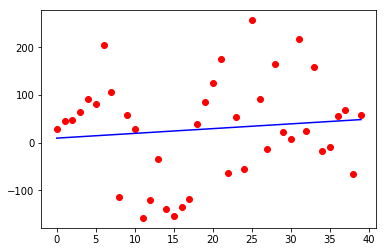

In [7]:
plt.scatter(xs,ys,color="red")
plt.plot(xs,preds,color="blue")
plt.show()

In [189]:
clf.coef_

array([ 3.900931])

In [190]:
clf=LinearRegression()
clf.fit(xs,ys)
clf.score(xs,ys)

0.12078752900647116

In [109]:
clf.coef_

array([ 1.125])

In [110]:
clf.intercept_

0.4166666666666643

In [124]:
preds=[]
for row in xs.itertuples():
    a=row[1]*clf.coef_+clf.intercept_
    preds.append(a[0])

In [125]:
preds

[2.6666666666666652,
 3.7916666666666656,
 4.9166666666666661,
 3.7916666666666656,
 6.0416666666666661,
 7.166666666666667,
 4.9166666666666661,
 8.2916666666666679,
 9.4166666666666679]

In [132]:
1-sum((preds-ys)*(preds-ys))/sum((np.mean(ys)-ys)*(np.mean(ys)-ys))


0.84375

In [130]:
np.mean(ys)

5.666666666666667

In [131]:
sum((np.mean(ys)-ys)*(np.mean(ys)-ys))

48.000000000000007

In [337]:
df=pd.read_csv("breast-cancer-wisconsin.data")

In [338]:
df.replace("?",-99999,inplace=True)

In [339]:
df.shape

(699, 11)

In [340]:
type(df)

pandas.core.frame.DataFrame

In [345]:
df.dtypes


id                        int64
 clump_thickness          int64
unif_cell_size            int64
 unif_cell_shape          int64
marg_adhesion             int64
single_epith_cell_size    int64
bare_nuclei               int64
bland_chrom               int64
norm_nucleoli             int64
mitoses                   int64
class                     int64
dtype: object

In [344]:
df.bare_nuclei=pd.to_numeric(df.bare_nuclei) 

In [362]:
df.head()


,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [377]:
f = lambda x: 2*x.max() - x.min()

In [378]:
df.apply(f)

id                        26847070
 clump_thickness                19
unif_cell_size                  19
 unif_cell_shape                19
marg_adhesion                   19
single_epith_cell_size          19
bare_nuclei                 100019
bland_chrom                     19
norm_nucleoli                   19
mitoses                         19
class                            6
dtype: int64

In [381]:
frame = pd.DataFrame(np.random.randn(4, 3), columns=list('bde'), index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [382]:
frame

,b,d,e
Utah,2.569591,0.918484,-1.337520
Ohio,0.513300,1.144732,0.085495
Texas,1.151373,1.737244,-0.256894
Oregon,-0.229392,1.199652,0.070421


In [383]:
frame.apply(f)

b    5.368575
d    2.556004
e    1.508510
dtype: float64

In [385]:
g= lambda x: 2*x+5

In [387]:
df

,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


AttributeError: 'DataFrame' object has no attribute 'map'

In [198]:
df.drop("id",1,inplace=True)

In [200]:
X=np.array(df.drop(["class"],1))
y=np.array(df["class"])

In [207]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

In [208]:
clf=neighbors.KNeighborsClassifier()
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [209]:
clf.score(X_test,y_test)

0.97857142857142854

In [220]:
clf.predict(a)

array([4, 4])

In [227]:
def random_clust(hm,var,center1=(0,0),center2=(10,10)):
    cl1=[]
    cl2=[]
    cl3=[]
    for i in range(hm):
        x1=random.uniform(-var,var)+center1[0]
        y1=random.uniform(-var,var)+center1[1]
        x2=random.uniform(-var,var)+center2[0]
        y2=random.uniform(-var,var)+center2[1]
        z1=random.uniform(-var,var)+center3[1]
        z2=random.uniform(-var,var)+center3[0]
        cl1.append([x1,y1,0])
        cl2.append([x2,y2,1])
        cl2.append([z1,z2,2])
    cl1=pd.DataFrame(cl1)
    cl2=pd.DataFrame(cl2)
    cl1.columns=["feat1","feat2","class"]
    cl2.columns=cl1.columns
    return cl1,cl2

In [291]:
cl1,cl2=random_clust(50,10)

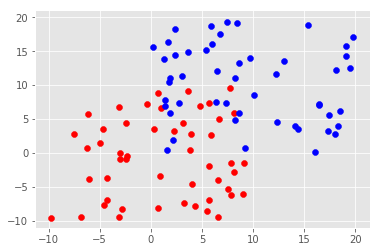

In [292]:
plt.scatter(cl1["feat1"],cl1["feat2"],color="red")
plt.scatter(cl2["feat1"],cl2["feat2"],color="blue")
plt.show()

In [293]:
class_1=pd.concat([cl1,cl2],ignore_index=True)

In [294]:
class_1

,feat1,feat2,class
0,-2.400951,4.379398,0
1,-4.705501,3.565325,0
2,-6.853591,-9.385295,0
3,-0.360182,7.183368,0
4,5.674060,7.409214,0
5,-3.143632,6.796432,0
6,3.993707,-4.555691,0
7,3.845309,0.486497,0
8,-4.554054,-7.738836,0
9,7.500558,-5.246180,0


In [295]:
X=class_1.drop("class",1)
y=class_1["class"]

In [296]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

In [407]:
clf=svm.SVC()
clf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [408]:
clf.score(X_test,y_test)

0.84999999999999998

In [393]:
preds=pd.DataFrame(clf.predict(X_test))

In [394]:
preds.index=X_test.index

In [395]:
super_preds=pd.concat([X_test,pd.DataFrame(preds)],axis=1,ignore_index=True)

In [396]:
super_preds.columns=["feat1","feat2","class"]

In [397]:
super_preds_1=super_preds[super_preds["class"]==1]

In [398]:
super_preds_0=super_preds[super_preds["class"]==0]

In [399]:
X_test_class=pd.concat([X_test,y_test],axis=1)

In [400]:
X_test_class

,feat1,feat2,class
78,2.116037,1.866510,1
93,2.764835,7.294207,1
95,19.061908,14.264409,1
55,17.342003,3.277289,1
22,9.017827,-6.006614,0
82,6.002736,16.129472,1
57,12.988701,13.550584,1
98,18.018837,2.832132,1
17,5.839702,2.615507,0
15,-6.003204,-3.821227,0


In [401]:
X_test_class1=X_test_class[X_test_class["class"]==1]

In [402]:
X_test_class0=X_test_class[X_test_class["class"]==0]

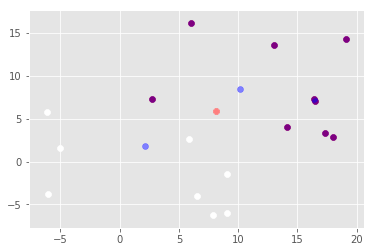

In [403]:
plt.scatter(super_preds_0["feat1"],super_preds_0["feat2"],color="white")
plt.scatter(super_preds_1["feat1"],super_preds_1["feat2"],color="red")
plt.scatter(X_test_class0["feat1"],X_test_class0["feat2"],color="white",alpha=0.5)
plt.scatter(X_test_class1["feat1"],X_test_class1["feat2"],color="blue",alpha=0.5)

plt.show()

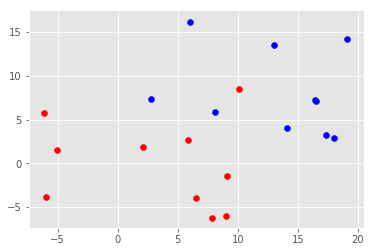

In [404]:
red_list=[]
blue_list=[]
for i in range(len(super_preds)):
    if super_preds.iloc[i,2]==0:
        red_list.append([super_preds.iloc[i,0],super_preds.iloc[i,1]])
    else:
        blue_list.append([super_preds.iloc[i,0],super_preds.iloc[i,1]])
plt.scatter(np.array(red_list).T[0],np.array(red_list).T[1],color="red")
plt.scatter(np.array(blue_list).T[0],np.array(blue_list).T[1],color="blue") 
plt.show()
    
    
    

In [ ]:
class Suport_Vector_Machine:
    def __init__(self,vis=True):
        self.vis=vis
        self.colors={1:"r",2:"b"}
        if self.vis: 
            sefl.fig=plt.figure()
            self.ax=self.fig.add_subplot(1,1,1)
    def fit(self,data):
        pass
    def predict(self,data):
        classification=np.sign(np.dot(np.array(features),self.w)+self.b)
    return classification
    
    
    
    

In [ ]:
data_dict={-1:np.array([[1,7],[2,4],[3,8]]),1:np.array([[5,1],[7,-2],[4,0]])}

In [462]:
def random_k(hm,var,center=((0,0),(10,10),(6,6)),clust=3):
    cl_dict={}
    for j in [0,1,2]:
        cl_dict[j]=[]
    for i in range(hm):
        for j in range(clust):
            x=random.uniform(-var,var)+center[j][0]
            y=random.uniform(-var,var)+center[j][1]
            cl_dict[j].append([x,y,j])
    for j in range(clust):
        cl_dict[j]=pd.DataFrame(cl_dict[j])
        cl_dict[j].columns=["feat1","feat2","class"]

    return cl_dict

In [463]:
cl_dict=random_k(50,10)

In [464]:
cl_dict[1]

,feat1,feat2,class
0,14.869106,3.359847,1
1,7.170835,18.897910,1
2,16.942172,2.731811,1
3,12.546908,1.517635,1
4,18.495386,9.239254,1
5,19.463236,14.097785,1
6,10.231685,2.654309,1
7,15.274765,6.820909,1
8,15.860238,12.267881,1
9,5.683115,9.473246,1


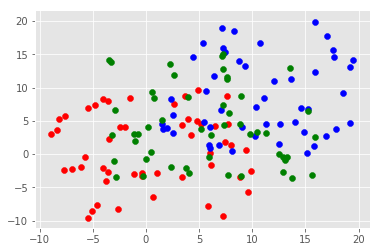

In [465]:
color_dict={0:"red",1:"blue",2:"green"}
for i in [0,1,2]:
    plt.scatter(cl_dict[i]["feat1"],cl_dict[i]["feat2"],color=color_dict[i])
plt.show()

In [469]:
X=pd.concat([cl_dict[0],cl_dict[1],cl_dict[2]],ignore_index=True)

In [470]:
X

,feat1,feat2,class
0,-4.003470,-2.055688,0
1,-4.570002,-7.578441,0
2,-6.990234,-2.224908,0
3,-8.346626,3.555309,0
4,-7.619019,5.761915,0
5,-4.057231,8.299504,0
6,-8.153389,5.243998,0
7,7.596770,8.788932,0
8,-1.547167,8.354440,0
9,-2.664023,-8.203790,0


In [13]:
from sklearn.cluster import KMeans

In [14]:
clf=KMeans(n_clusters=4)

KMeans(precompute_distances=)

clf.fit(X.iloc[:,0:2])

In [510]:
X_lab=X.iloc[:,0:2]

In [511]:
lables=clf.labels_
centroids=clf.cluster_centers_

In [512]:
colors[lables[8]]

'b.'

In [513]:
type(X_lab)

pandas.core.frame.DataFrame

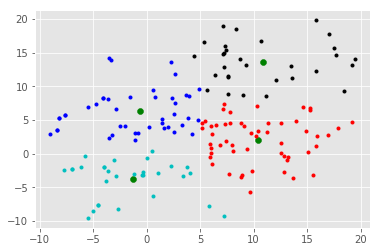

In [519]:
for i in range(len(X_lab)):
    plt.plot(X_lab.iloc[i,0],X_lab.iloc[i,1],colors[lables[i]])
plt.scatter(centroids[:,0], centroids[:,1], color="green")
plt.show()
    

In [15]:
from sklearn.cluster import KMedoids

ImportError: cannot import name KMedoids

In [518]:
colors=["r.","b.","k.","c."]

In [533]:
def non_num_data(df):
    columns=df.columns.values
    for column in columns:
        text_digit_vals={}
        def convert_to_int(val):
            return text_digit_vals[val]
        
        if df[column].dtype !=np.int64 and df[column].dtype !=np.float64:
            column_contents=df[column].values.tolist()
            unique_elements=set(column_contents)
            x=0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique]=x
                    x+=1
            df[column]=list(map(convert_to_int,df[column]))
        
        return df
        

In [535]:
dict1={1:"hej",2:"ty"}

TypeError: 'int' object is not iterable

In [537]:
"hej" in dict1

False

In [526]:
X.columns.values

array(['feat1', 'feat2', 'class'], dtype=object)

In [531]:
for column in X.columns.values:
    column_contents=X[column].values.tolist()
    unique_elements=set(column_contents)
    print (unique_elements)


set([5.498739250301026, 1.9690175098759148, 19.19641886205726, -1.0998914238231992, -7.692174879400662, -3.2858276127747423, 9.079025377894737, 5.941465436189386, 1.4918613609524458, 5.683115084672437, 7.755212866406737, 5.3276997751068, -3.4802112005389034, 1.063510926030613, -3.5601901364961215, 15.856281570632511, 6.041109237449348, 9.757873870196391, 5.845091047861361, -0.2904437662738051, -8.153388594562141, 4.928241931739485, 13.696224653530408, 8.850223999415771, 15.274765498351368, 7.963772071326481, -3.0498131422106063, 19.20247756199852, 15.887528007031236, 11.131214702815855, 2.291003253138836, 8.722595832205066, 7.259630517363917, 13.101892588202933, -5.720107667312819, 5.94682540765281, 2.3882438703411024, 8.983920555951746, 13.618569298228898, 7.452993843466885, 15.286657484069949, 7.303037651332575, 6.52322817538899, -5.04816197245842, -2.8770427295243124, -6.9902338761429705, 6.040920764118112, -5.45897622434685, 6.112371978779684, 4.8374009812018315, 3.6715472132819844

In [532]:

for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique]=x
                    x+=1

NameError: name 'text_digit_vals' is not defined

In [99]:
data = np.random.rand(5,10) # 5 entities, each contains 10 features
label = np.random.randint(2, size=5) # binary target
test_label=np.random.randint(2, size=5)
dtrain = xgb.DMatrix( data, label=label)
test_data=np.random.rand(5,10)
dtest= xgb.DMatrix(test_data, label=test_label)

In [100]:
data

array([[ 0.81721258,  0.67482026,  0.26363603,  0.02528996,  0.57530518,
         0.77970531,  0.24114639,  0.73940894,  0.5895879 ,  0.00791256],
       [ 0.81188248,  0.94562902,  0.98900877,  0.63707034,  0.06852243,
         0.3726465 ,  0.77569094,  0.71985273,  0.50486407,  0.38868939],
       [ 0.56372941,  0.33039822,  0.26786607,  0.01763438,  0.38456908,
         0.71015566,  0.53681217,  0.53710872,  0.77457404,  0.55916678],
       [ 0.90523743,  0.91540261,  0.22464424,  0.07302556,  0.43923891,
         0.59508911,  0.22649415,  0.25376147,  0.07025852,  0.92614948],
       [ 0.01882871,  0.29712931,  0.70546512,  0.61035682,  0.18056286,
         0.18711077,  0.57933066,  0.33474009,  0.28066262,  0.29439045]])

In [101]:
label

array([0, 0, 0, 0, 1])

In [153]:
param = {'max_depth':2, 'eta':1, 'silent':0, 'objective':'binary:logitraw' }
param['nthread'] = 4
#param["num_class"]= 2
param['eval_metric'] = "auc"

In [154]:
from sklearn.metrics import f1_score

In [155]:
evallist  = [(dtest,'eval'), (dtrain,'train')]



In [156]:
num_round = 10
bst = xgb.train( param, dtrain, num_round, evallist)

XGBoostError: [15:32:03] src/objective/regression_obj.cc:90: Check failed: (preds.size()) == (info.labels.size()) labels are not correctly providedpreds.size=10, label.size=5

In [152]:
evallist

[(<xgboost.core.DMatrix at 0x7f6ad1687fd0>, 'eval'),
 (<xgboost.core.DMatrix at 0x7f6b0d94afd0>, 'train')]

In [106]:
dtrain.get_label()

array([ 0.,  0.,  0.,  0.,  1.], dtype=float32)

In [121]:
def evalerror(preds,dtrain):
    labels = dtrain.get_label()
    a=f1_score(labels,preds)
    return a


In [122]:
evalerror([1,0,1,1,1,0],[1,0,1,1,1,1])

AttributeError: 'list' object has no attribute 'get_label'

In [123]:
dtest.get_label()

array([ 1.,  1.,  0.,  0.,  0.], dtype=float32)

In [151]:
bst = xgb.train(param, dtrain, num_round)
                #, evallist, evalerror)


In [208]:
data = np.random.rand(5,10) # 5 entities, each contains 10 features
label = np.random.randint(2, size=5) # binary target
test_label=np.random.randint(2, size=5)
dtrain = xgb.DMatrix( data, label=label)
test_data=np.random.rand(5,10)
dtest= xgb.DMatrix(test_data, label=test_label)

In [241]:
param = {'max_depth':2, 'eta':1, 'silent':1, 'objective':'binary:logistic' }
param['nthread'] = 4
param['eval_metric'] = 'auc'
#param["num_class"]=2

In [242]:
param['eval_metric'] = ['auc']

In [243]:
evallist  = [(dtest,'eval'), (dtrain,'train')]



In [244]:
num_round = 10
bst = xgb.train( param, dtrain, num_round, evallist )



[0]	eval-auc:0.5	train-auc:0.5
[1]	eval-auc:0.5	train-auc:0.5
[2]	eval-auc:0.5	train-auc:0.5
[3]	eval-auc:0.5	train-auc:0.5
[4]	eval-auc:0.5	train-auc:0.5
[5]	eval-auc:0.5	train-auc:0.5
[6]	eval-auc:0.5	train-auc:0.5
[7]	eval-auc:0.5	train-auc:0.5
[8]	eval-auc:0.5	train-auc:0.5
[9]	eval-auc:0.5	train-auc:0.5


reg:linear; reg:logistic; binary:logistic; binary:logitraw; count:poisson; rank:pairwise; reg:gamma; 

In [246]:
from sklearn.linear_model import LogisticRegression

In [247]:
logreg=LogisticRegression()

In [249]:
est=logreg.fit(data,label)

In [250]:
est.predict(test_data)

array([0, 0, 0, 0, 1])

In [252]:
from sklearn.metrics  import f1_score

In [251]:
test_label

array([1, 1, 1, 0, 0])

In [253]:
f1_score(est.predict(test_data),test_label)

0.0

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as data
%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 80, 'linewidths':0}


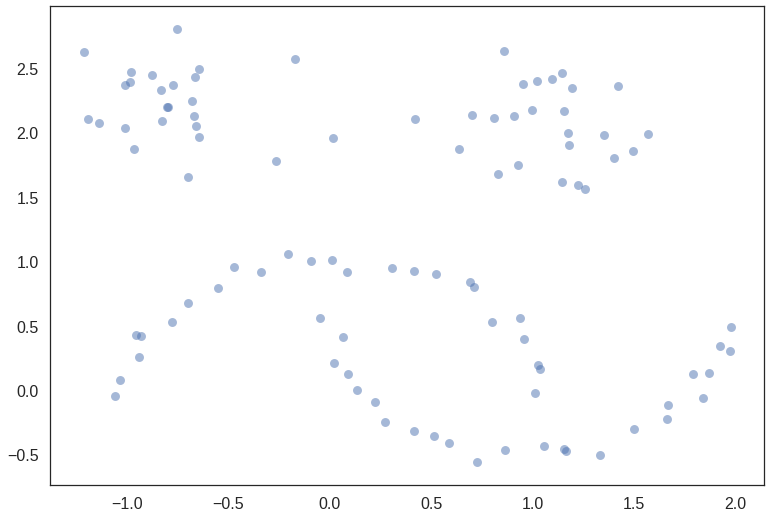

In [17]:
moons, _ = data.make_moons(n_samples=50, noise=0.05)
blobs, _ = data.make_blobs(n_samples=50, centers=[(-0.75,2.25), (1.0, 2.0)], cluster_std=0.25)
test_data = np.vstack([moons, blobs])
plt.scatter(test_data.T[0], test_data.T[1], color='b', **plot_kwds)

In [20]:
import hdbscan

In [23]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
a=clusterer.fit(test_data)


In [22]:
help(hdbscan.HDBSCAN)

Help on class HDBSCAN in module hdbscan.hdbscan_:

class HDBSCAN(sklearn.base.BaseEstimator, sklearn.base.ClusterMixin)
 |  Perform HDBSCAN clustering from vector array or distance matrix.
 |  
 |  HDBSCAN - Hierarchical Density-Based Spatial Clustering of Applications
 |  with Noise. Performs DBSCAN over varying epsilon values and integrates
 |  the result to find a clustering that gives the best stability over epsilon.
 |  This allows HDBSCAN to find clusters of varying densities (unlike DBSCAN),
 |  and be more robust to parameter selection.
 |  
 |  Parameters
 |  ----------
 |  min_cluster_size : int, optional (default=5)
 |      The minimum size of clusters; single linkage splits that contain
 |      fewer points than this will be considered points "falling out" of a
 |      cluster rather than a cluster splitting into two new clusters.
 |  
 |  min_samples : int, optional (default=None)
 |      The number of samples in a neighbourhood for a point to be
 |      considered a core 

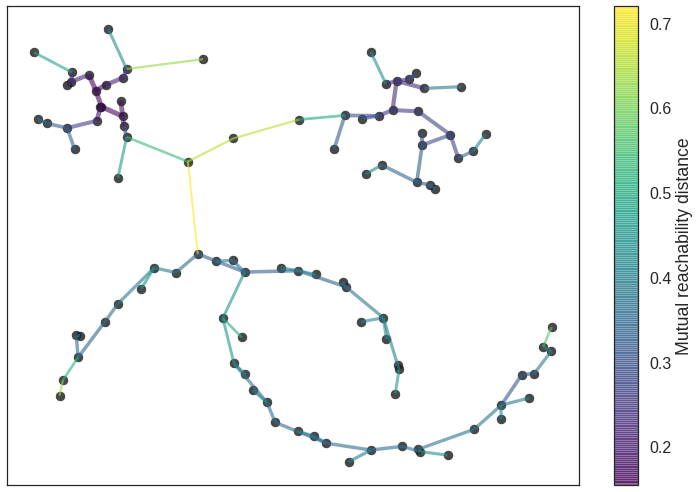

In [36]:
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=80,
                                      edge_linewidth=2)


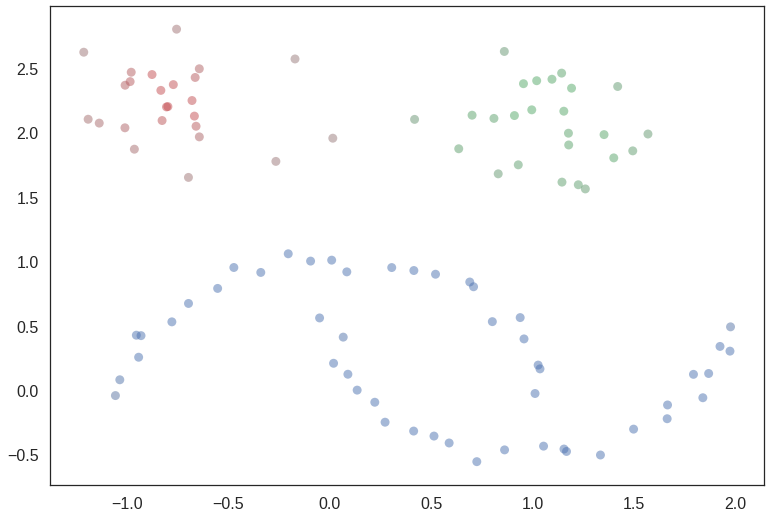

In [37]:
palette = sns.color_palette()
cluster_colors = [sns.desaturate(palette[col], sat)
                  if col >= 0 else (0.5, 0.5, 0.5) for col, sat in
                  zip(clusterer.labels_, clusterer.probabilities_)]
plt.scatter(test_data.T[0], test_data.T[1], c=cluster_colors, **plot_kwds)

In [39]:
data.load_wine

AttributeError: 'module' object has no attribute 'load_wine'